In [151]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import geopandas as gpd
import scipy
import numpy as np 
import swifter
import re 
from collections import Counter
from sklearn.decomposition import PCA
from tqdm import tqdm

%matplotlib inline


In [129]:
condocalc = pd.read_csv('DOF__Cooperative_Comparable_Rental_Income__Citywide_.csv')

Creating Dataframes and what they all mean: 
- The condos Dataframe has all condos and their comparables in wide format. 
- I separated out each comparable using iloc and kept column 59 which is the report year. 
- I then created an estimated column to ensure we know which of the buildings have estimated income versus actual income. 
- Because each comparable unit is seperated out by column, currently their row index matches the row index of the condo that they are compared to. Because I will be shifting everything to long format I created the Condo Reference column across all the dataframes so that this number will pull the relationship crafted by the Department of Finance. 
- After creating indexes is when I have dropped all na columns because not all condos have three comparable units. 
- All the comparable units were put into a dataframe called comparablerentals and then merged in long format with the condos to create the allbldgs dataframe. 

In [130]:
condos = condocalc.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 59]]

In [131]:
comparable1 = condocalc.iloc[:,[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 59]]
comparable2 = condocalc.iloc[:,[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 59]]
comparable3 = condocalc.iloc[:,44:60]

In [132]:
#I am inputting the 'Estimated' column 0 equals not estimated and 1 is estimated 
comparable1['Estimated'] = 0
comparable2['Estimated'] = 0 
comparable3['Estimated'] = 0
condos['Estimated'] = 1
condos['Distance from Co-op in miles'] = 0.0
comparable1['Condo Reference'] = range(0,31348)
comparable2['Condo Reference'] = range(0,31348)
comparable3['Condo Reference'] = range(0, 31348)
condos['Condo Reference'] = range(0, 31348)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [133]:
comparable2 = comparable2.dropna()
comparable3 = comparable3.dropna()

In [134]:
comparable1 = comparable1.rename(columns={'Boro-Block-Lot 1': 'Boro-Block-Lot',
                  'Address 1': 'Address', 
                  'Neighborhood 1': 'Neighborhood',
                  'Building Classification 1': 'Building Classification',
                   'Total Units 1': 'Total Units',
                   'Year Built 1': 'Year Built', 
                   'Gross SqFt 1': 'Gross SqFt', 
                   'Estimated Gross Income 1': 'Estimated Gross Income',
                   'Gross Income per SqFt 1': 'Gross Income per SqFt', 
                   'Estimated Expense 1': 'Estimated Expense', 
                   'Expense per SqFt 1': 'Expense per SqFt', 
                   'Net Operating Income 1': 'Net Operating Income', 
                   'Full Market Value 1': 'Full Market Value', 
                   'Market Value per SqFt 1': 'Market Value per SqFt'})

In [135]:
comparable2 = comparable2.rename(columns={'Boro-Block-Lot 2': 'Boro-Block-Lot',
                  'Address 2': 'Address', 
                  'Neighborhood 2': 'Neighborhood',
                  'Building Classification 2': 'Building Classification',
                   'Total Units 2': 'Total Units',
                   'Year Built 2': 'Year Built', 
                   'Gross SqFt 2': 'Gross SqFt', 
                   'Estimated Gross Income 2': 'Estimated Gross Income',
                   'Gross Income per SqFt 2': 'Gross Income per SqFt', 
                   'Estimated Expense 2': 'Estimated Expense', 
                   'Expense per SqFt 2': 'Expense per SqFt', 
                   'Net Operating Income 2': 'Net Operating Income', 
                   'Full Market Value 2': 'Full Market Value', 
                   'Market Value per SqFt 2': 'Market Value per SqFt'})
    

In [136]:
comparable3 = comparable3.rename(columns={'Boro-Block-Lot 3': 'Boro-Block-Lot',
                  'Address 3': 'Address', 
                  'Neighborhood 3': 'Neighborhood',
                  'Building Classification 3': 'Building Classification',
                   'Total Units 3': 'Total Units',
                   'Year Built 3': 'Year Built', 
                   'Gross SqFt 3': 'Gross SqFt', 
                   'Estimated Gross Income 3': 'Estimated Gross Income',
                   'Gross Income per SqFt 3': 'Gross Income per SqFt', 
                   'Estimated Expense 3': 'Estimated Expense', 
                   'Expense per SqFt 3': 'Expense per SqFt', 
                   'Net Operating Income 3': 'Net Operating Income', 
                   'Full Market Value 3': 'Full Market Value', 
                   'Market Value per SqFt 3': 'Market Value per SqFt'})

In [137]:
comparable2 = comparable2.rename(columns={'Distance from Co-op in miles 1': 'Distance from Co-op in miles'})
comparable3 = comparable3.rename(columns={'Distance from Co-op in miles 2': 'Distance from Co-op in miles'})


In [192]:
condos.columns

Index(['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification',
       'Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income',
       'Gross Income per SqFt', 'Estimated Expense', 'Expense per SqFt',
       'Net Operating Income', 'Full Market Value', 'Market Value per SqFt',
       'Report Year', 'Estimated', 'Distance from Co-op in miles',
       'Condo Reference', 'Borough', 'Borough PCA 1', 'Borough PCA 2',
       'Borough PCA 3'],
      dtype='object')

In [138]:
frames = [comparable1, comparable2, comparable3]
comparablerentals = pd.concat(frames, axis=0)

In [139]:
bldgs = [comparablerentals, condos]
allbuildings = pd.concat(bldgs, axis=0, sort=False)

Using the Borough-Block-Lot Configuration: 
- I found the borough for each address and then put it back into the original dataframe to prep it for geocoding. 

In [140]:
def get_borough(BBL): 
    Borough = [] 
    for i in BBL: 
        if i == '1':
            Borough.append('Manhattan')
        elif i == '2': 
            Borough.append('The Bronx')
        elif i == '3': 
            Borough.append('Brooklyn')
        elif i == '4': 
            Borough.append('Queens')
        elif i == '5': 
            Borough.append('Staten Island')
    return Borough

In [141]:
BBL = comparablerentals['Boro-Block-Lot'] 
BBL = BBL.str.split('-')
BBL = np.array(BBL)
BBL = [item[0] for item in BBL]

In [142]:
Boroughlist = get_borough(BBL)
Counter(Boroughlist).keys()
Counter(Boroughlist).values()

dict_values([46942, 15145, 16832, 7536, 455])

In [143]:
comparablerentals['Borough'] = Boroughlist

In [144]:
comparablerentals['Address'] = comparablerentals['Address'] + ' ' + comparablerentals['Borough']
comparablerentals['Address'] = comparablerentals['Address'].map(lambda x: str(x).upper())

In [145]:
BBL = comparable1['Boro-Block-Lot']
BBL = BBL.str.split('-')
BBL = np.array(BBL)
BBL = [item[0] for item in BBL]

In [146]:
Boroughlist = get_borough(BBL)
Counter(Boroughlist).keys()
Counter(Boroughlist).values()

dict_values([16932, 5421, 6087, 2748, 160])

In [147]:
comparable1['Borough'] = Boroughlist

In [148]:
comparable1['Address'] = comparable1['Address'] + ' ' + comparable1['Borough']
comparable1['Address'] = comparable1['Address'].map(lambda x: str(x).upper())

In [149]:
BBL = comparable2['Boro-Block-Lot']
BBL = BBL.str.split('-')
BBL = np.array(BBL)
BBL = [item[0] for item in BBL]

In [150]:
Boroughlist = get_borough(BBL)
Counter(Boroughlist).keys()
Counter(Boroughlist).values()

dict_values([16820, 5362, 6047, 2703, 160])

In [151]:
comparable2['Borough'] = Boroughlist

In [152]:
comparable2['Address'] = comparable2['Address'] + ' ' + comparable2['Borough']
comparable2['Address'] = comparable2['Address'].map(lambda x: str(x).upper())

In [153]:
BBL = comparable3['Boro-Block-Lot']
BBL = BBL.str.split('-')
BBL = np.array(BBL)
BBL = [item[0] for item in BBL]

In [154]:
Boroughlist = get_borough(BBL)
Counter(Boroughlist).keys()
Counter(Boroughlist).values()

dict_values([13190, 4362, 4698, 135, 2085])

In [155]:
comparable3['Borough'] = Boroughlist

In [156]:
comparable3['Address'] = comparable3['Address'] + ' ' + comparable3['Borough']
comparable3['Address'] = comparable3['Address'].map(lambda x: str(x).upper())

In [157]:
BBL = allbuildings['Boro-Block-Lot']
BBL = BBL.str.split('-')
BBL = np.array(BBL)
BBL = [item[0] for item in BBL]

In [158]:
Boroughlist = get_borough(BBL)
Counter(Boroughlist).keys()
Counter(Boroughlist).values()

dict_values([63874, 20566, 22919, 10284, 615])

In [159]:
allbuildings['Borough'] = Boroughlist

In [160]:
#the Borough was added back into the address column to run just one column through the geopy geocoder
allbuildings['Address'] = allbuildings['Address'] + ' ' + allbuildings['Borough']
allbuildings['Address'] = allbuildings['Address'].map(lambda x: str(x).upper())

In [161]:
BBL = condos['Boro-Block-Lot'] 
BBL = BBL.str.split('-')
BBL = np.array(BBL)
BBL = [item[0] for item in BBL]

In [162]:
Boroughlist = get_borough(BBL)
Counter(Boroughlist).keys()
Counter(Boroughlist).values()

dict_values([16932, 5421, 6087, 2748, 160])

In [163]:
condos['Borough'] = Boroughlist

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Grouped PCA for Dummy Encoded Columns 
- I tried PCA on the Dummy Encoded Neighborhood column but there were 208 columns and no single column explained more than 7% of the variance. 
- The columns that I did do PCA for are Borough and Building Class 
- I have to perform this on all dataframes but the one that I am doing the PCA off will be the Comparable Rentals DataFrame 

Building Class Transformation

In [ ]:
bldgclass_dummies = pd.get_dummies(comparablerentals['Building Classification'])

In [40]:
bldgclasspca = PCA(n_components=10)
class_pca = bldgclasspca.fit(bldgclass_dummies)

In [41]:
bldgclass_eigenvals = class_pca.explained_variance_
bldgclass_ratio = class_pca.explained_variance_ratio_

print(('eigenvalues:', bldgclass_eigenvals))
print(('explained variance pct:', bldgclass_ratio))
#not sure that dummy encoding the neighborhood variable and then using PCA will get us a better set of variables considering 


('eigenvalues:', array([0.2154283 , 0.11753431, 0.09238487, 0.07541812, 0.05893571,
       0.04905169, 0.04741012, 0.04273565, 0.03188359, 0.02733378]))
('explained variance pct:', array([0.24465076, 0.13347763, 0.10491671, 0.08564846, 0.06693023,
       0.05570547, 0.05384122, 0.04853266, 0.03620854, 0.03104156]))


In [42]:
#by reducing the dimensionality of the building class variable from 26 to 10 we can explain
# 86% of the variance within the building class variable 
0.24465076 + 0.13347763 + 0.10491671 + 0.08564846 + 0.06693023 + 0.05570547 + 0.05384122 + 0.04853266 + 0.03620854 + 0.03104156

0.8609532400000001

In [44]:
classpcatransform = class_pca.transform(bldgclass_dummies)

In [45]:
classpcatransform = pd.DataFrame(classpcatransform)

In [46]:
classpcatransform.rename(columns= {0: 'Building Class PCA 1', 1: 'Building Class PCA 2', 2: 'Building Class PCA 3',\
                         3: 'Building Class PCA 4', 4: 'Building Class PCA 5', 5: 'Building Class PCA 6',\
                         6: 'Building Class PCA 7', 7: 'Building Class PCA 8', 8: 'Building Class PCA 9', 9: 'Building Class PCA 10'}, inplace=True)

,Building Class PCA 1,Building Class PCA 2,Building Class PCA 3,Building Class PCA 4,Building Class PCA 5,Building Class PCA 6,Building Class PCA 7,Building Class PCA 8,Building Class PCA 9,Building Class PCA 10
0,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074752,-0.021196
1,-0.179442,-0.082136,-0.035526,0.097492,-0.073891,-0.016083,0.001484,0.035096,0.095294,0.037469
2,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074752,-0.021196
3,-0.248502,-0.172037,-0.109416,0.613829,0.705194,0.044622,-0.003579,-0.058833,-0.074752,-0.021196
4,-0.179442,-0.082136,-0.035526,0.097492,-0.073891,-0.016083,0.001484,0.035096,0.095294,0.037469


Transformation of Comparable Dataframes Individually based on same hyperplane

In [55]:
comparable1classdummies = pd.get_dummies(comparable1['Building Classification'])

In [57]:
comparable1classdummies = class_pca.transform(comparable1classdummies)

In [58]:
comparable1classdummies = pd.DataFrame(comparable1classdummies)

In [59]:
comparable1classdummies.rename(columns= {0: 'Building Class PCA 1', 1: 'Building Class PCA 2', 2: 'Building Class PCA 3',\
                         3: 'Building Class PCA 4', 4: 'Building Class PCA 5', 5: 'Building Class PCA 6',\
                         6: 'Building Class PCA 7', 7: 'Building Class PCA 8', 8: 'Building Class PCA 9', 9: 'Building Class PCA 10'}, inplace=True)

In [69]:
comparable2classdummies = pd.get_dummies(comparable2['Building Classification'])


In [70]:
comparable2classdummies = class_pca.transform(comparable2classdummies)

In [71]:
comparable2classdummies = pd.DataFrame(comparable2classdummies)

In [72]:
comparable2classdummies.rename(columns= {0: 'Building Class PCA 1', 1: 'Building Class PCA 2', 2: 'Building Class PCA 3',\
                         3: 'Building Class PCA 4', 4: 'Building Class PCA 5', 5: 'Building Class PCA 6',\
                         6: 'Building Class PCA 7', 7: 'Building Class PCA 8', 8: 'Building Class PCA 9', 9: 'Building Class PCA 10'}, inplace=True)

In [74]:
comparable3classdummies = pd.get_dummies(comparable3['Building Classification'])

In [75]:
comparable3classdummies = class_pca.transform(comparable3classdummies)

In [76]:
comparable3classdummies = pd.DataFrame(comparable3classdummies)

In [77]:
comparable3classdummies.rename(columns= {0: 'Building Class PCA 1', 1: 'Building Class PCA 2', 2: 'Building Class PCA 3',\
                         3: 'Building Class PCA 4', 4: 'Building Class PCA 5', 5: 'Building Class PCA 6',\
                         6: 'Building Class PCA 7', 7: 'Building Class PCA 8', 8: 'Building Class PCA 9', 9: 'Building Class PCA 10'}, inplace=True)

In [84]:
condosclassdummies = pd.get_dummies(condos['Building Classification'])

In [91]:
comparablerentals['Building Classification'].unique()

array(['D7-ELEVATOR', 'D8-ELEVATOR', 'D9-ELEVATOR', 'D5-ELEVATOR',
       'D6-ELEVATOR', 'D1-ELEVATOR', 'C7-WALK-UP', 'C1-WALK-UP',
       'D3-ELEVATOR', 'C4-WALK-UP', 'C5-WALK-UP', 'D2-ELEVATOR',
       'C9-WALK-UP', 'C1  -WALK-UP', 'D1  -ELEVATOR', 'D5  -ELEVATOR',
       'D6  -ELEVATOR', 'D9  -ELEVATOR', 'D7  -ELEVATOR', 'D3  -ELEVATOR',
       'C7  -WALK-UP', 'C4  -WALK-UP', 'C5  -WALK-UP', 'D8  -ELEVATOR',
       'D2  -ELEVATOR', 'C9  -WALK-UP'], dtype=object)

In [90]:
condos['Building Classification'].unique()

array(['D4-ELEVATOR', 'D0-ELEVATOR', 'C6-WALK-UP', 'C8-WALK-UP',
       'C6  -WALK-UP', 'D4  -ELEVATOR', 'D0  -ELEVATOR', 'C8  -WALK-UP'],
      dtype=object)

In [ ]:
#I think we should throw out building classification??? 

Borough Transformation 

In [164]:
allcomparableboroughdummies = pd.get_dummies(comparablerentals['Borough'])

In [165]:
boroughpca = PCA(n_components=5)
boroughpca = boroughpca.fit(allcomparableboroughdummies)

In [166]:
borough_eigenvals = boroughpca.explained_variance_
borough_ratio = boroughpca.explained_variance_ratio_

print(('eigenvalues:', borough_eigenvals))
print(('explained variance pct:', borough_ratio))
#by eliminating two inputs of 5 I can still capture 97.9% of the variance- 
#this is likely because there are fewer condos in the Bronx and Staten Island

('eigenvalues:', array([3.41127487e-01, 1.83306763e-01, 1.01927791e-01, 6.49190721e-03,
       1.01367815e-27]))
('explained variance pct:', array([5.39030353e-01, 2.89650975e-01, 1.61060528e-01, 1.02581444e-02,
       1.60175686e-27]))


In [167]:
pca_borough = PCA(n_components=3)
boroughpca = pca_borough.fit_transform(allcomparableboroughdummies)

In [168]:
boroughpca = pd.DataFrame(boroughpca)

In [169]:
boroughpca.rename(columns={0:'Borough PCA 1', 1:'Borough PCA 2', 2: 'Borough PCA 3'}, inplace=True)

In [175]:
comparablerentals = comparablerentals.join(boroughpca)

In [170]:
comparable1borodummies = pd.get_dummies(comparable1['Borough'])

In [171]:
comparable1borodummies = pca_borough.transform(comparable1borodummies)

In [172]:
comparable1borodummies = pd.DataFrame(comparable1borodummies)

In [173]:
comparable1borodummies.rename(columns={0:'Borough PCA 1', 1:'Borough PCA 2', 2: 'Borough PCA 3'}, inplace=True)

In [174]:
comparable1 = comparable1.join(comparable1borodummies)

In [105]:
comparable2borodummies = pd.get_dummies(comparable2['Borough'])

In [106]:
comparable2borodummies = pca_borough.transform(comparable2borodummies)

In [109]:
comparable2borodummies = pd.DataFrame(comparable2borodummies)

In [110]:
comparable2borodummies.rename(columns={0:'Borough PCA 1', 1:'Borough PCA 2', 2: 'Borough PCA 3'}, inplace=True)

In [176]:
comparable2 = comparable2.join(comparable2borodummies)

In [177]:
comparable3borodummies = pd.get_dummies(comparable3['Borough'])

In [178]:
comparable3borodummies = pca_borough.transform(comparable3borodummies)

In [179]:
comparable3borodummies = pd.DataFrame(comparable3borodummies)

In [180]:
comparable3borodummies.rename(columns={0:'Borough PCA 1', 1:'Borough PCA 2', 2: 'Borough PCA 3'}, inplace=True)

In [181]:
comparable3 = comparable3.join(comparable3borodummies)

In [182]:
condoborodummies = pd.get_dummies(condos['Borough'])

In [183]:
condoborodummies = pca_borough.transform(condoborodummies)

In [184]:
condoborodummies = pd.DataFrame(condoborodummies)

In [185]:
condoborodummies.rename(columns={0:'Borough PCA 1', 1:'Borough PCA 2', 2: 'Borough PCA 3'}, inplace=True)

In [186]:
condoborodummies.head(1)

,Borough PCA 1,Borough PCA 2,Borough PCA 3
0,-0.534149,-0.019101,-0.034965


In [187]:
condos = condos.join(condoborodummies)

In [78]:
import geopy.geocoders
from geopy.geocoders import Nominatim

In [141]:
Address = comparablerentals['Address'].iloc[0:3]

In [143]:
list(Address)

['156 FRONT STREET MANHATTAN',
 '50 BATTERY PLACE MANHATTAN',
 '82 FULTON STREET MANHATTAN']

In [155]:
geolocator = Nominatim(user_agent='my-application')
location = geolocator.geocode(comparablerentals['Address'].iloc[1])
print(location.address)
print(location.latitude)
print(location.longitude)

South Cove Plaza, 50, Battery Place, Battery Park City, Manhattan Community Board 1, Manhattan, New York County, NYC, New York, 10280, USA
40.70665895
-74.0179877071221


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-app")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5)
comparablerentals['Real Address'] = comparablerentals['Address'].apply(geocode)

comparablerentals['point'] = comparablerentals['Real Address'].apply(lambda loc: tuple(loc.point) if loc else None)

def get_addresses(Address): 
    NYCAddress = []
    NYClat = []
    NYClong = []
    geolocator = Nominatim(user_agent='my-application')
    for Address in Address: 
        location = geolocator.geocode(Address)
        NYCAddress.append(location.address())
        NYClat.append(location.latitude())
        NYClong.append(location.longitude())
    print(NYCAddress, NYClat, NYClong)
    

In [1]:
"/Applications/Google Chrome.app/Contents/MacOS/Google Chrome" \
  --proxy-server="socks5://localhost:1080" \
  --user-data-dir="/tmp/smithson-vm-m" http://smithson-vm-m:8088

SyntaxError: invalid syntax (<ipython-input-1-ad4260734fdd>, line 3)

{'place_id': 222594252, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 38605248, 'boundingbox': ['40.706044529412', '40.706144529412', '-74.004930882353', '-74.004830882353'], 'lat': '40.7060945294118', 'lon': '-74.0048808823529', 'display_name': '156, Front Street, Financial District, Manhattan Community Board 1, Manhattan, New York County, NYC, New York, 10038, USA', 'class': 'place', 'type': 'house', 'importance': 0.411}


In [76]:
comparable1.to_csv('comparable1.csv', index=None, header=True)
comparable2.to_csv('comparable2.csv', index=None, header=True)
comparable3.to_csv('comparable3.csv', index=None, header=True)
condos.to_csv('condos.csv', index=None, header=True)
allbuildings.to_csv('allbuildings.csv', index=None, header=True)
comparablerentals.to_csv('comparablerentals.csv', index=None, header=True)    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


'/Users/Erika/Desktop/General_Assembly/Capstone'

In [4]:
geocoding_df = pd.read_csv('capstonegeocoding.csv')

In [8]:
geocoding_df.head()

,Unnamed: 0,Address
0,0,"{'latitude': 40.706074, 'formatted_address': '..."
1,1,"{'latitude': 40.7096248, 'formatted_address': ..."
2,2,"{'latitude': 40.7098261, 'formatted_address': ..."
3,3,"{'latitude': 40.7066593, 'formatted_address': ..."
4,4,"{'latitude': 40.7074532, 'formatted_address': ..."


In [62]:
def get_coordinates(Address): 
    lat_match = re.findall(r'latitude..............', Address)
    lat_match2 = str(lat_match).split(':')
    lat_match3 = lat_match2[1]
    lat_match4 = re.search(r'\d+.\d+', lat_match3).group(0)
    long_match = re.findall(r'longitude..............', Address)
    long_match2 = str(lat_match).split(':')
    long_match3 = lat_match2[1]
    long_match4 = re.search(r'\d+.\d+', lat_match3).group(0)
    return lat_match4, long_match4

In [64]:
geocoding_df['geometry'] = geocoding_df.Address.apply(get_coordinates)

In [65]:
geocoding_df.Address.iloc[2]

"{'latitude': 40.7098261, 'formatted_address': '12 John St, New York, NY 10038, USA', 'longitude': -74.0091249}"

In [100]:
def get_std_address(Address): 
    addr_match = re.findall(r'ress.+(?=USA)', Address)
    addr_match2 = str(addr_match).split(':')
    addr_match3 = addr_match2[1]
    addr_match4 = str(addr_match3).rstrip(', "]')
    return addr_match4

In [102]:
geocoding_df['standardized_address'] = geocoding_df['Address'].apply(get_std_address)

In [103]:
geocoding_df.shape

(1000, 4)

In [104]:
geocoding_df2 = pd.read_csv('output2.csv')

In [107]:
geocoding_df2['geometry'] = geocoding_df2['Address'].apply(get_coordinates)

In [110]:
geocoding_df2['standardized_address'] = geocoding_df2['Address'].apply(get_std_address)

In [123]:
geocoding_df_complete = pd.concat([geocoding_df, geocoding_df2], axis = 0)

In [127]:
geocoding_df_complete.set_index('Unnamed: 0', inplace=True)

In [133]:
geocoding_df_complete.to_csv('comparablerental_geocode.csv', index=None, header=True)

In [137]:
import geopandas as gpd

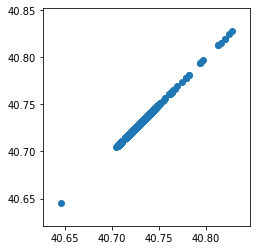

In [148]:
gpd.GeoDataFrame(geocoding_df,geometry=geocoding_df.geometry).plot()

In [143]:
from shapely.geometry import Point 

In [146]:
geocoding_df['geometry'] = geocoding_df['geometry'].apply(lambda x : Point(float(x[0]),float(x[1])))

In [192]:
condos_chunk = pd.read_csv('condos.csv', chunksize=5000)
condos_chunk_list = []

In [193]:
nominatim_geo_points = [] 
nominatim_std_address = []
def get_nominatim_geo(*args): 
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="my-app", timeout=1000)

    from geopy.extra.rate_limiter import RateLimiter
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5) 
    nominatim_geo_points.append(condos['Full Address'].progress_apply(geocode)) 
    for point in nominatim_geo_points: 
        nominatim_std_address.append(lambda loc: tuple(loc.point) if loc else None)
    return nominatim_geo_points 
    return nominatim_std_address

In [ ]:
for chunk in condos_chunk: 
    geocoded_chunk = get_nominatim_geo(chunk)
    condos_chunk_list.append(geocoded_chunk)


  0%|          | 143/31348 [07:18<26:44:59,  3.09s/it]


  1%|          | 284/31348 [14:29<26:32:45,  3.08s/it]


  1%|▏         | 425/31348 [21:39<26:09:33,  3.05s/it]


  2%|▏         | 566/31348 [28:59<27:08:37,  3.17s/it]


  2%|▏         | 678/31348 [34:50<27:29:42,  3.23s/it]

In [158]:
condos.head()

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Gross Income per SqFt,Estimated Expense,...,Full Market Value,Market Value per SqFt,Report Year,Estimated,Distance from Co-op in miles,Condo Reference,Borough,Borough PCA 1,Borough PCA 2,Borough PCA 3
0,1-00011-0014,26 BEAVER STREET,FINANCIAL,D4-ELEVATOR,21,1909,51387,1780046,34.64,448095,...,10056000,195.69,2012,1,0.0,0,Manhattan,-0.534149,-0.019101,-0.034965
1,1-00028-0001,3 HANOVER SQUARE,FINANCIAL,D0-ELEVATOR,211,1926,239121,6578219,27.51,1602111,...,37570000,157.12,2012,1,0.0,1,Manhattan,-0.534149,-0.019101,-0.034965
2,1-00064-0008,53 LIBERTY STREET,FINANCIAL,D4-ELEVATOR,92,1911,167448,5398524,32.24,1461821,...,29722000,177.50,2012,1,0.0,2,Manhattan,-0.534149,-0.019101,-0.034965
3,1-00065-0017,176 BROADWAY,FINANCIAL,D4-ELEVATOR,83,1927,168176,5600261,33.30,1992886,...,27236000,161.95,2012,1,0.0,3,Manhattan,-0.534149,-0.019101,-0.034965
4,1-00094-0001,80 GOLD STREET,SOUTHBRIDGE,D4-ELEVATOR,1664,1971,2075590,37256841,17.95,14238547,...,162215000,78.15,2012,1,0.0,4,Manhattan,-0.534149,-0.019101,-0.034965


In [163]:
condos['Full Address'] = condos['Address'] + ' ' + condos['Borough'] + ', NY'

In [170]:
tqdm().pandas()

0it [00:00, ?it/s]


In [184]:
get_nominatim_geo(condos['Full Address'].iloc[1])

  0%|          | 9/31348 [00:22<24:49:38,  2.85s/it]

KeyboardInterrupt: 

[]
